In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [3]:
boston = datasets.load_boston()

In [5]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
x = boston.data[:, 5] # 保使用房间数量这个特征
x.shape

(506,)

In [10]:
y = boston.target
y.shape

(506,)

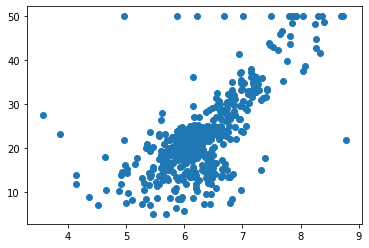

In [11]:
plt.scatter(x, y)
plt.show()

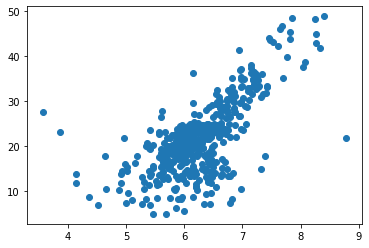

In [13]:
x = x[y < 50.0]
y = y[y < 50.0]
plt.scatter(x, y)
plt.show()

### 简单线性回归法

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

In [17]:
x_train.shape

(392,)

In [18]:
x_test.shape

(98,)

In [20]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        """初始化Single Linear Regression模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集X_train, y_train训练Single Linear Regression模型"""
        assert x_train.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert len(x_train) == len(y_train), "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        num = (x_train - x_mean).dot(y_train - y_mean)
        d = (x_train - x_mean).dot(x_train - x_mean)

        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

    def predict(self, x_predict):
        """给定待测数据集X_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, "Simple Linear Regressor can only solve single feature training data"
        assert self.a_ is not None and self.b_ is not None, "must fit before predict"
        return [self._predict(x) for x in x_predict]

    def _predict(self, x_single):
        """给定单个待预测数据s_single，返回x_single的预测结果"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression()"

In [22]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

In [25]:
reg.a_

7.8608543562689555

In [24]:
reg.b_

-27.459342806705543

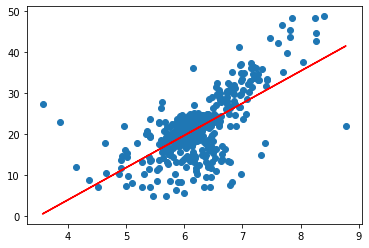

In [28]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [29]:
y_predict = reg.predict(x_test)

### MSE

In [31]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [33]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE

In [36]:
mae_test = np.sum(np.absolute(y_predict-y_test)) / len(y_test)
mae_test

3.5430974409463873

### scikit-learn中的MSE和MAE

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [39]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

## R Squared

In [42]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)

0.6129316803937322

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937324